In [ ]:
# target_per_class = 90, but it doestn't affect that much

import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\current_dataset.csv"

data = pd.read_csv(data_dir)

cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.info  

<bound method DataFrame.info of     Agricultural Zone   Month  Week  Rainfall (mm)  Mean Temp. (*C)  \
1               Bogra  August     1           63.3             29.3   
4               Dhaka    July     2           73.5             29.1   
5            Dinajpur    June     4           96.0             29.2   
6            Faridpur    July     4           84.5             29.0   
7              Khulna  August     3           76.5             29.1   
..                ...     ...   ...            ...              ...   
368            Khulna     May     1           17.5             30.1   
369           Jashore    June     1           49.5             30.7   
370          Faridpur   April     1           18.0             28.5   
371          Dinajpur   April     1            8.0             26.7   
372             Dhaka     May     1           21.0             29.0   

     RHmean (%)  SShr (hrs)  WD (deg)  WS (Km/hr) label  
1          83.6        35.0     137.0         6.3  Aman  

In [10]:
target_per_class = 90

import numpy as np
import pandas as pd

augmented_data = []

numeric_cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

grouped = data.groupby('label')

for label, group in grouped:
    n_existing = len(group)
    n_to_generate = max(0, target_per_class - n_existing)

    for _ in range(n_to_generate):
        row = group.sample(n=1, replace=True).iloc[0].copy()

        for col in numeric_cols:
            std_dev = group[col].std()
            if np.isnan(std_dev):
                std_dev = 1  # fallback
            noise = np.random.normal(0, std_dev * 0.30)
            row[col] += noise

        augmented_data.append(row)

augmented_df = pd.DataFrame(augmented_data) 

data = pd.concat([data, augmented_df], ignore_index=True)


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
data.drop(columns=['label'], axis=1, inplace=True)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data = pd.get_dummies(data, columns=['Agricultural Zone'], prefix='Zone')
data = pd.get_dummies(data, columns=['Month'], prefix='Month')
data = pd.get_dummies(data,columns=['Week'], prefix='Week')
data.head()

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Wheat': 20, 'corn khorip-1': 21, 'garlic': 22, 'indian jujube': 23, 'jackfruit': 24, 'jute': 25, 'khorip green chilli': 26, 'khorip lau (grourd)': 27, 'khorip onion': 28, 'khorip pointed grourd': 29, 'khorip pumpkin Cucurbita': 30, 'licchi': 31, 'masterd seed': 32, 'papaya': 33, 'pineapple': 34, 'robi green chilli ': 35, 'robi lau (gourd)': 36, 'robi onion': 37, 'robi pointed gourd': 38, 'robi pumpkin Cucurbita': 39}


,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded,Zone_Barisal,Zone_Bogra,Zone_Chittagonj,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Week_1,Week_2,Week_3,Week_4
0,63.3,29.3,83.6,35.0,137.0,6.3,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,73.5,29.1,83.0,32.0,159.0,5.9,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,96.0,29.2,83.0,31.0,121.0,3.7,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,84.5,29.0,85.5,32.0,180.0,5.6,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,76.5,29.1,85.6,31.0,170.0,6.5,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [14]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'weighted')
    recall = recall_score(y_test, y_pred,average = 'weighted')
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

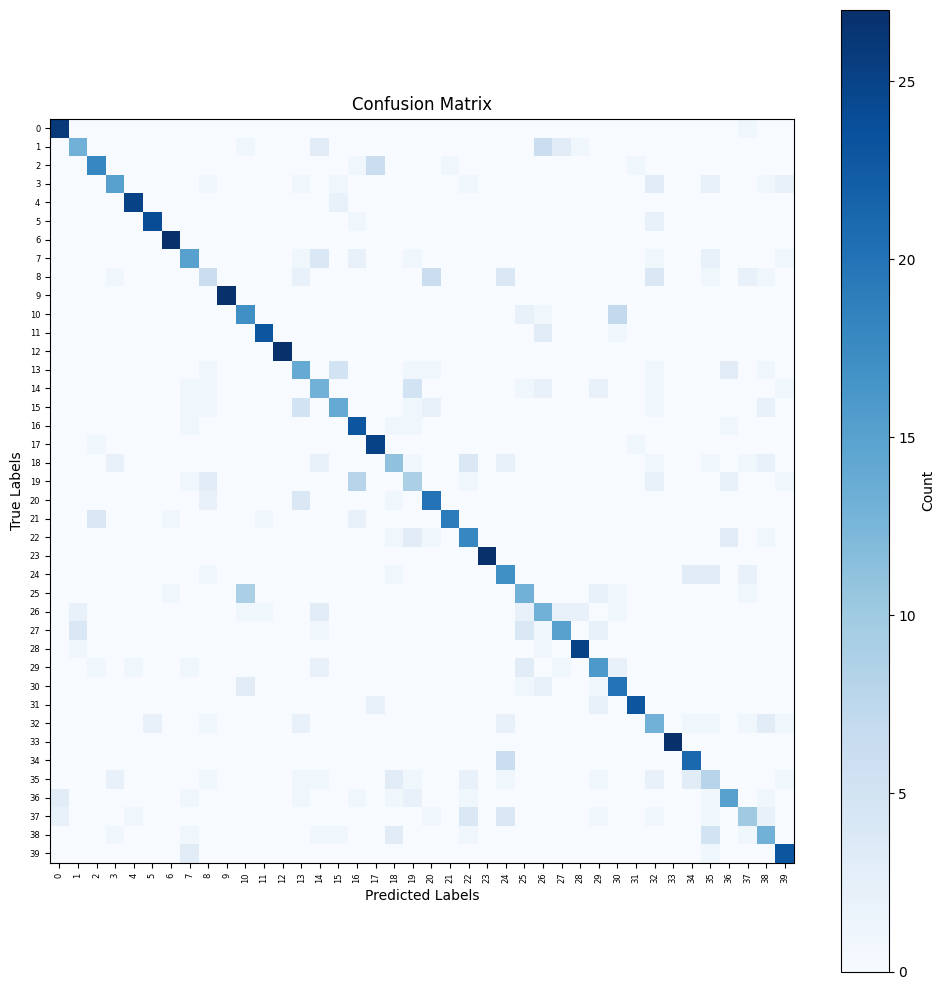

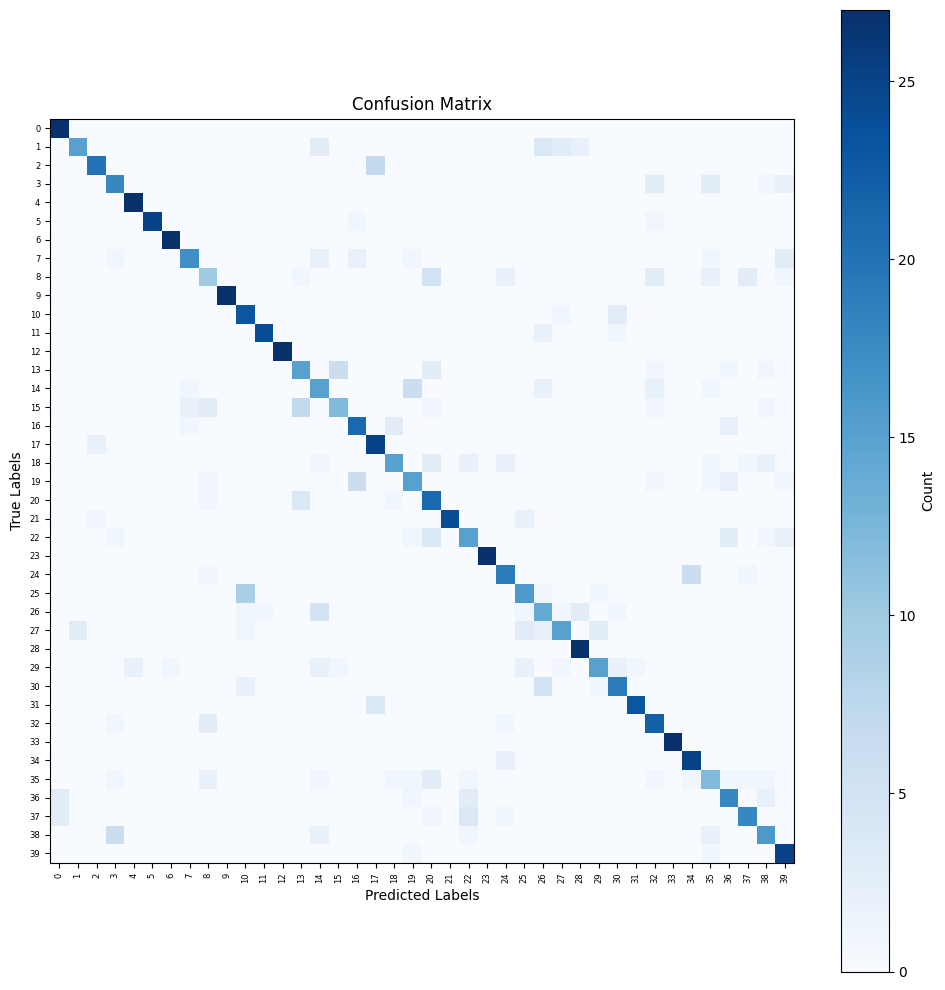

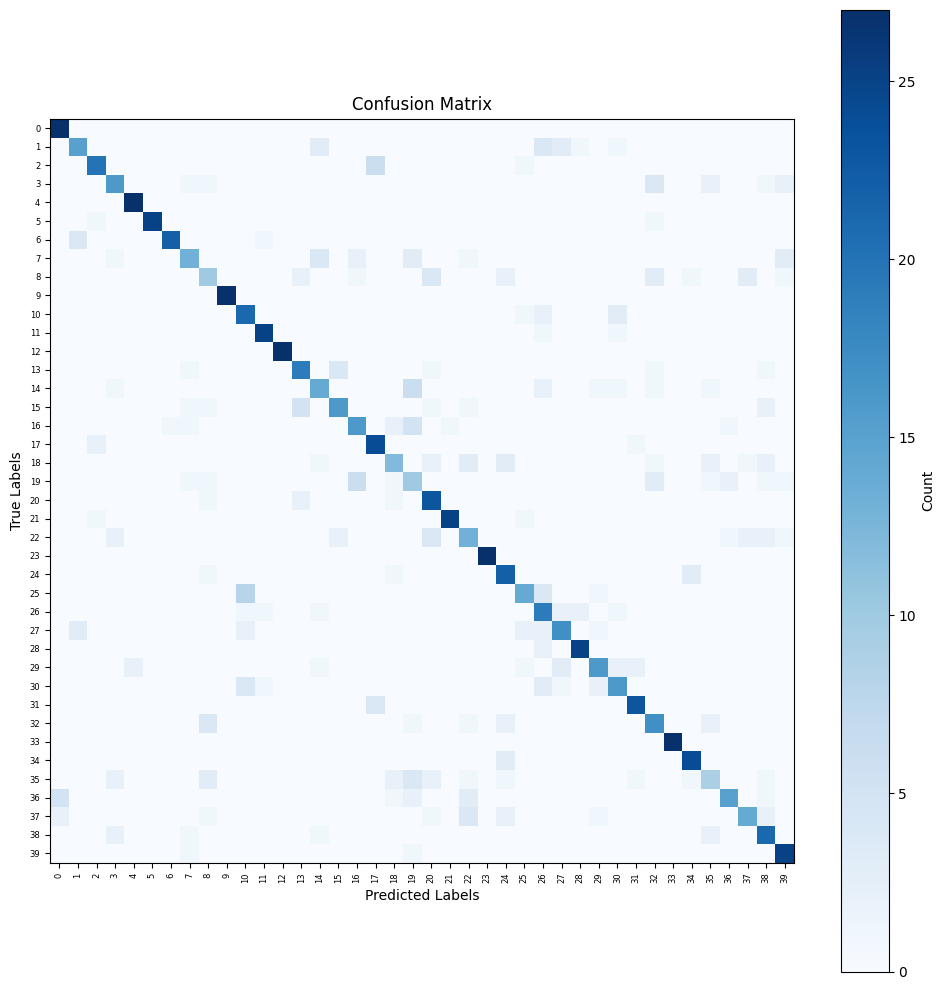

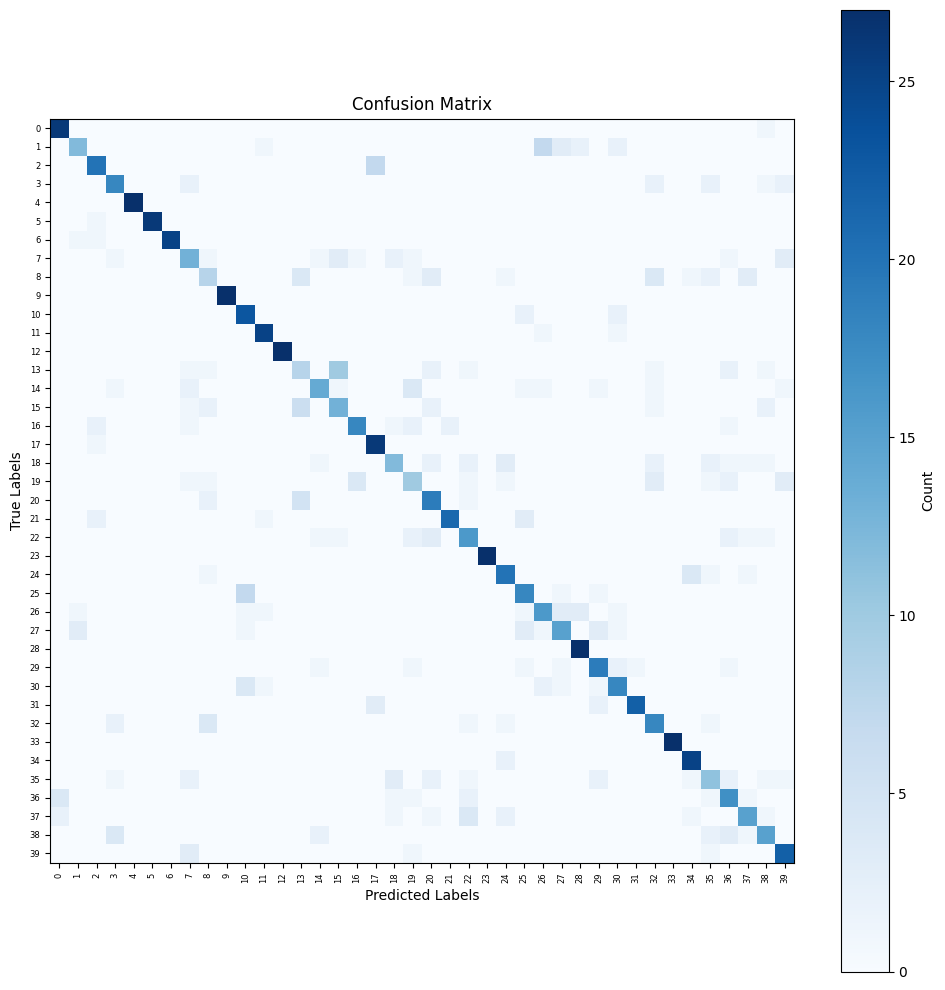

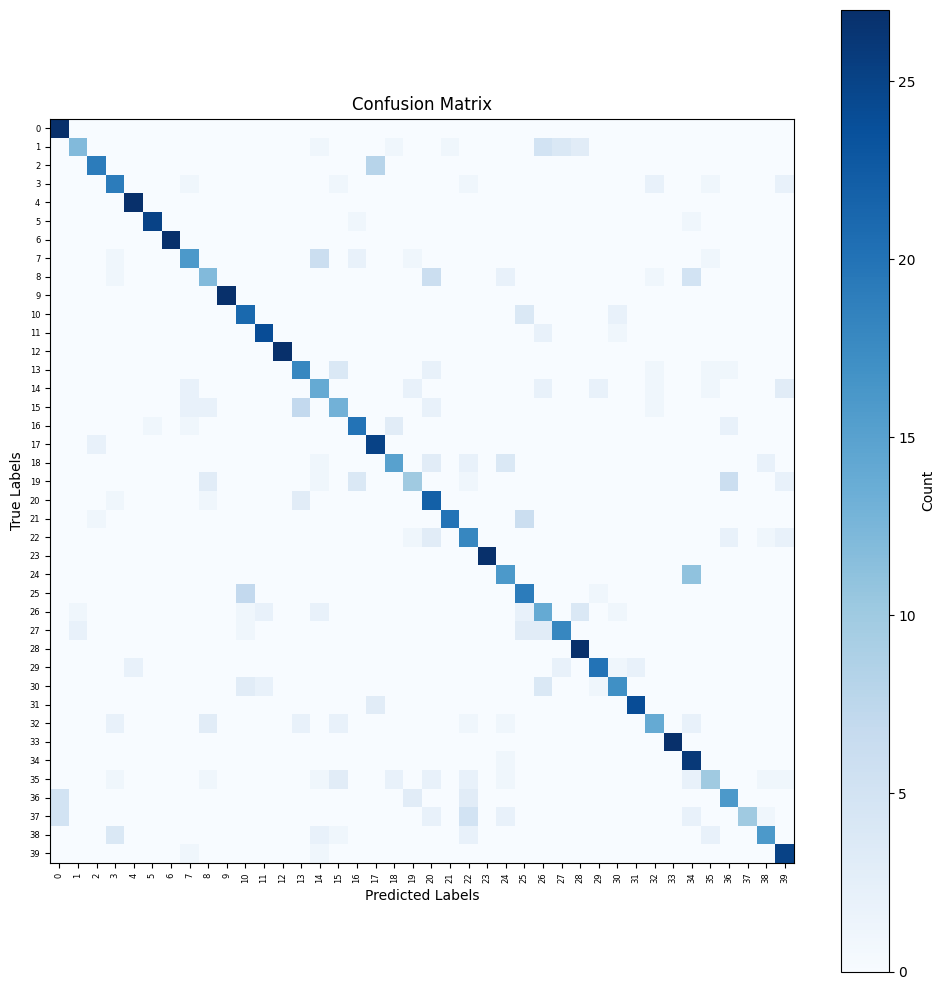

Learning rate set to 0.082946
0:	learn: 3.5261609	total: 54ms	remaining: 53.9s
1:	learn: 3.3719635	total: 100ms	remaining: 50s
2:	learn: 3.1892473	total: 146ms	remaining: 48.5s
3:	learn: 3.0809745	total: 192ms	remaining: 47.8s
4:	learn: 2.9527429	total: 244ms	remaining: 48.5s
5:	learn: 2.8593526	total: 291ms	remaining: 48.3s
6:	learn: 2.7573745	total: 339ms	remaining: 48s
7:	learn: 2.6461265	total: 388ms	remaining: 48.1s
8:	learn: 2.5613530	total: 438ms	remaining: 48.3s
9:	learn: 2.4886521	total: 489ms	remaining: 48.4s
10:	learn: 2.4117807	total: 537ms	remaining: 48.3s
11:	learn: 2.3553017	total: 587ms	remaining: 48.3s
12:	learn: 2.2980073	total: 634ms	remaining: 48.1s
13:	learn: 2.2425948	total: 681ms	remaining: 48s
14:	learn: 2.1958748	total: 730ms	remaining: 47.9s
15:	learn: 2.1453344	total: 778ms	remaining: 47.8s
16:	learn: 2.1007107	total: 826ms	remaining: 47.7s
17:	learn: 2.0633330	total: 875ms	remaining: 47.7s
18:	learn: 2.0200022	total: 925ms	remaining: 47.8s
19:	learn: 1.97822

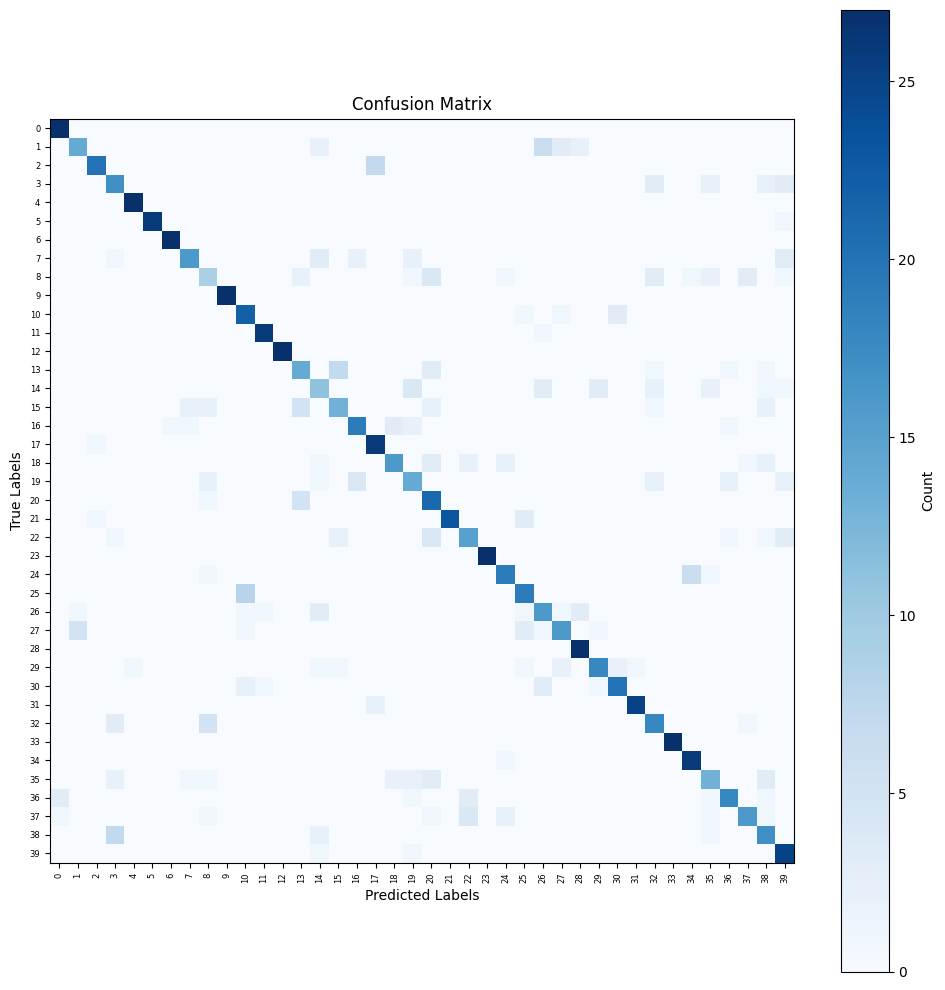

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1620
[LightGBM] [Info] Number of data points in the train set: 2520, number of used features: 36
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM]

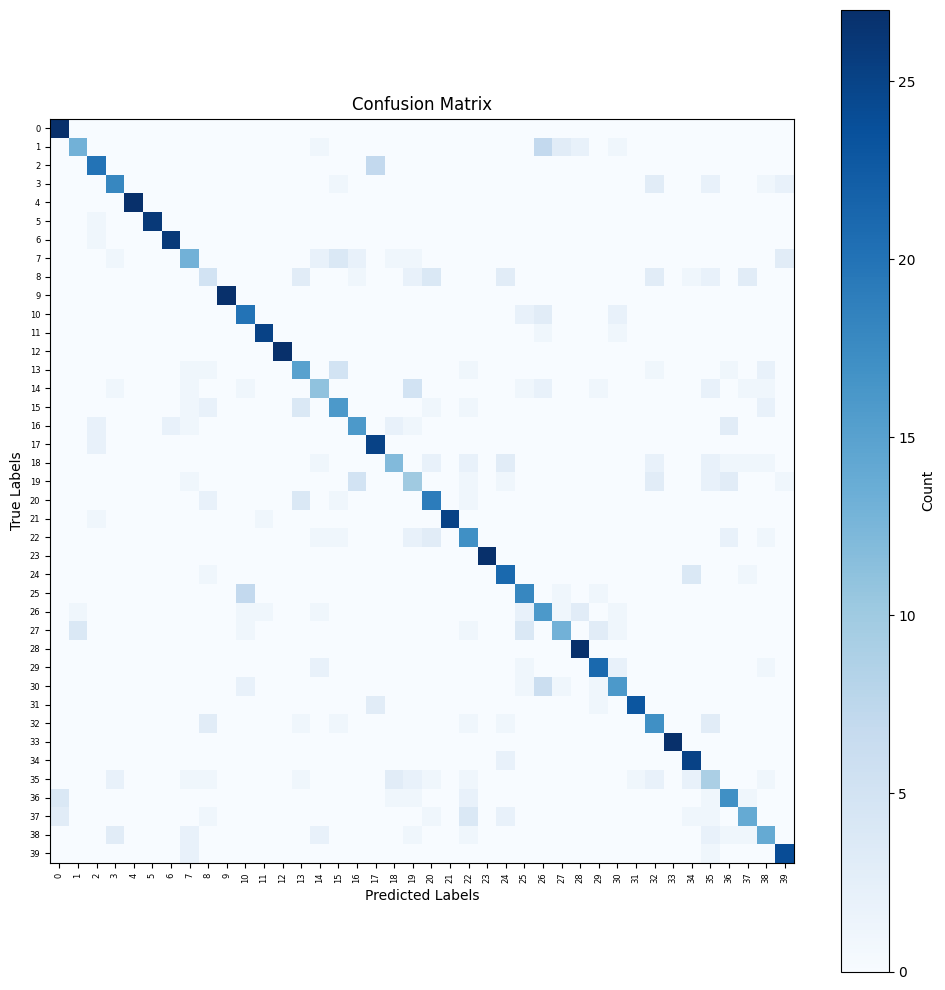

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,KNN,CatBoost,LightGBM
Accuracy,0.674074,0.743519,0.720370,0.709259,0.725926,0.744444,0.712037
Precision,0.675938,0.749033,0.724823,0.707649,0.741102,0.748709,0.709236
Recall,0.674074,0.743519,0.720370,0.709259,0.725926,0.744444,0.712037
F1 Score,0.670896,0.740413,0.716686,0.704105,0.720488,0.741516,0.706102


In [15]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data